In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col='id')
print(f"""The first movie in the data set was released in {df['release_date'].min()}\nwhile the most recent was released in {df['release_date'].max()}""")

The first movie in the data set was released in Apr 1, 1975
while the most recent was released in Sep 9, 2016


In [3]:
# A sample of the dataframe
df.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
66,"Mar 9, 2001",Dayereh,"$10,000","$673,780","$673,780"
48,"Oct 5, 2012",Frankenweenie,"$39,000,000","$35,287,788","$81,150,788"
7,"Dec 31, 2010",Konferenz der Tiere,"$30,000,000",$0,"$53,048,539"


In [4]:
# Cleaning up the value columns
df['production_budget'] = df['production_budget'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['domestic_gross'] = df['domestic_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
# Dropping all "0" values from the worldwide_gross column
df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan)
warnings.filterwarnings('ignore')
df = df.dropna()

<ipython-input-4-d569e0ce009c>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan)


In [5]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['roi'] = round(((df['profit']/df['production_budget']) * 100), 2)
# We're using the below function to isolate the release year from the release date
df['release_year'] = df['release_date'].map(lambda x: int(x[-4:]))

In [6]:
# Anything older than the year 2005 will be removed, so we have a 10 year scope, using the last decade.
filtered_df = df[df['release_year'] >= 2005]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3070 non-null   object 
 1   movie              3070 non-null   object 
 2   production_budget  3070 non-null   float64
 3   domestic_gross     3070 non-null   float64
 4   worldwide_gross    3070 non-null   float64
 5   profit             3070 non-null   float64
 6   roi                3070 non-null   float64
 7   release_year       3070 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 215.9+ KB


In [7]:
# Removing anything with a negative profit margin as we are looking for the average profitable films.
# Negative profit margins don't do our dataset any good
filtered_df = filtered_df[filtered_df['roi'] >= 0]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2062 non-null   object 
 1   movie              2062 non-null   object 
 2   production_budget  2062 non-null   float64
 3   domestic_gross     2062 non-null   float64
 4   worldwide_gross    2062 non-null   float64
 5   profit             2062 non-null   float64
 6   roi                2062 non-null   float64
 7   release_year       2062 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 145.0+ KB


In [8]:
lowest_film = df[(df['production_budget'] == df['production_budget'].min())]
highest_film = df[(df['production_budget'] == df['production_budget'].max())]
df_range = [int(filtered_df['production_budget'].min()),int(filtered_df['production_budget'].max())]
display(lowest_film, highest_film, df_range)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,179941.0,16358.27,2005


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.26,2009


[1100, 425000000]

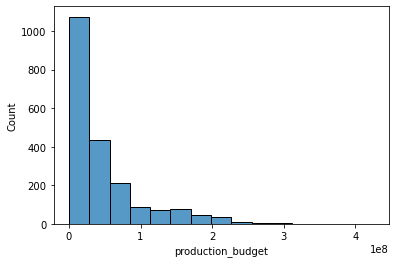

In [9]:
sns.histplot(data=filtered_df, x='production_budget',bins=15);

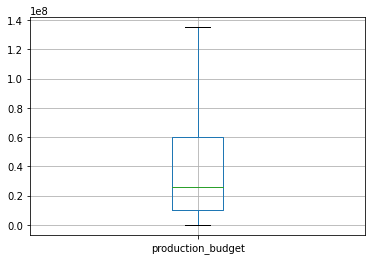

In [10]:
filtered_df.boxplot('production_budget', showfliers=False);

In [11]:
filt_25_percentile = filtered_df['production_budget'].quantile(.25)
filt_75_percentile = filtered_df['production_budget'].quantile(.75)
print(f"""Because of the heavy skew, we will divide our data using IQR.\n\nThe 25th percentile is {filt_25_percentile} and the 75th is {filt_75_percentile}.""")

Because of the heavy skew, we will divide our data using IQR.

The 25th percentile is 10000000.0 and the 75th is 60000000.0.


In [13]:
filtered_df_low = filtered_df[(filtered_df['production_budget'] < filt_25_percentile)]
filtered_df_mid = filtered_df[(filtered_df['production_budget'] >= filt_25_percentile) & (filtered_df['production_budget'] <= filt_75_percentile)]
filtered_df_high = filtered_df[(filtered_df['production_budget'] > filt_75_percentile)]

In [14]:
print(f"""Our movie counts are:\n\nLow DF: {filtered_df_low['movie'].count()}\n\nMid DF: {filtered_df_mid['movie'].count()}\n\nHigh DF: {filtered_df_high['movie'].count()}""")

Our movie counts are:

Low DF: 480

Mid DF: 1083

High DF: 499


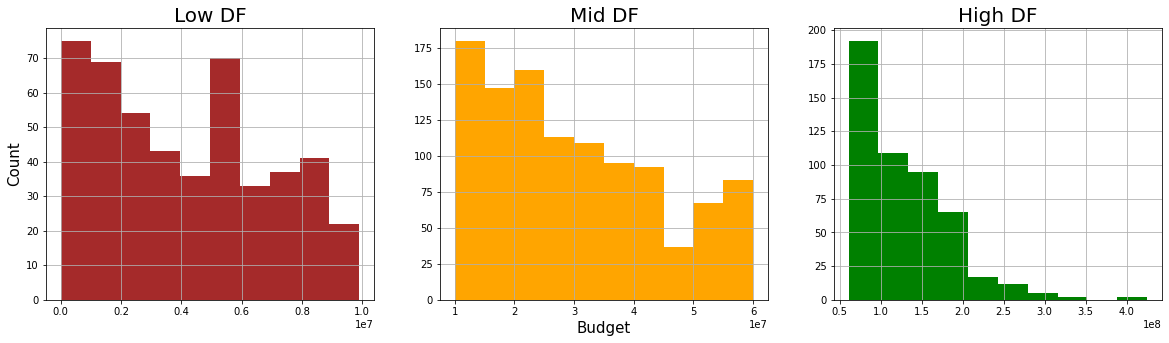

In [15]:
fig, axs = plt.subplots(1,3)
filtered_df_low['production_budget'].hist(ax=axs[0],figsize=(20,5),color='brown')
filtered_df_mid['production_budget'].hist(ax=axs[1],figsize=(20,5),color='orange')
filtered_df_high['production_budget'].hist(ax=axs[2],figsize=(20,5),color='green')
axs[0].set_title('Low DF',fontsize=20)
axs[0].set_ylabel('Count',fontsize=15)
axs[1].set_title('Mid DF',fontsize=20)
axs[1].set_xlabel('Budget',fontsize=15)
axs[2].set_title('High DF',fontsize=20);

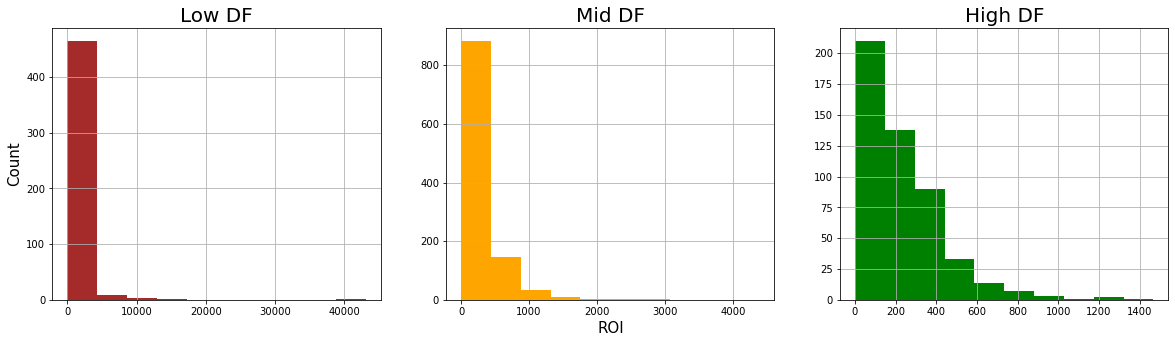

In [16]:
fig, axs = plt.subplots(1,3)
filtered_df_low['roi'].hist(ax=axs[0],figsize=(20,5),color='brown')
filtered_df_mid['roi'].hist(ax=axs[1],figsize=(20,5),color='orange')
filtered_df_high['roi'].hist(ax=axs[2],figsize=(20,5),color='green')
axs[0].set_title('Low DF',fontsize=20)
axs[0].set_ylabel('Count',fontsize=15)
axs[1].set_title('Mid DF',fontsize=20)
axs[1].set_xlabel('ROI',fontsize=15)
axs[2].set_title('High DF',fontsize=20);

In [ ]:
display(filtered_df_low.corr(), filtered_df_mid.corr(), filtered_df_high.corr())

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
filtered_df_high.plot.scatter(x='production_budget',y='roi',title='Budget v ROI for High-Budget Films', ax=ax, c='orange')
ax.set_xlabel('Budget')
ax.set_ylabel('ROI');

In [ ]:
sns.lmplot(x='production_budget',y='prof_margin',data=filtered_df_high);

In [ ]:
filtered_df_high.describe()